<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/btc_period_and_prediction_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_func_pkg import one_dimension_data,find_pivot,blind_boundary_exp_smooth_curve,most_frequency_cenarios,min_max_cenarios
import yfinance as yf

In [3]:
fbpdov0=pd.read_csv("/content/fbpdov.csv")
fbpdun0=pd.read_csv("/content/fbpdun.csv")

In [8]:
fbpdov1=fbpdov0.iloc[0,:].values
fbpdun1=fbpdun0.iloc[0,:].values

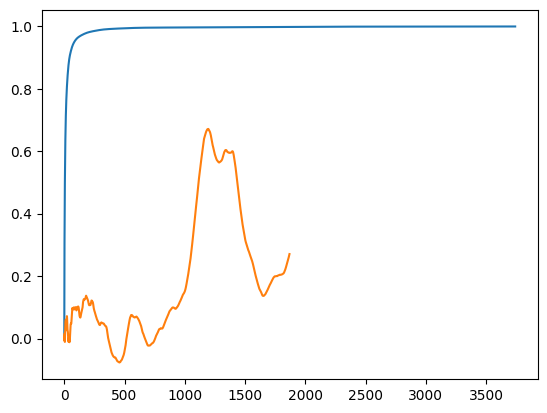

In [9]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)

In [10]:
fp=find_pivot(fbpdun1)

In [11]:
fp[0]

array([  22,  115,  181,  227,  306,  557,  598,  901, 1193, 1340, 1396])

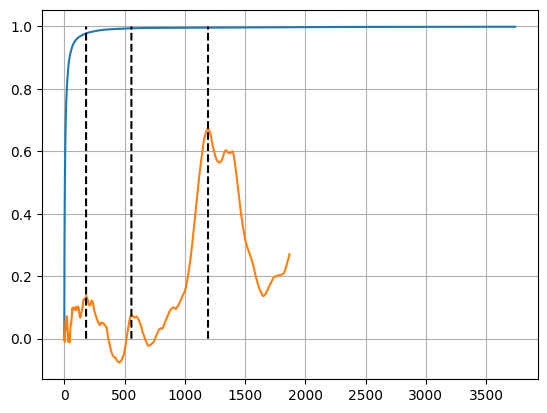

In [12]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)
plt.plot([181]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.plot([557]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.plot([1193]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.grid()
plt.show()

In [13]:
btc=yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [14]:
bbesc181=blind_boundary_exp_smooth_curve(btc.Close.values,181)

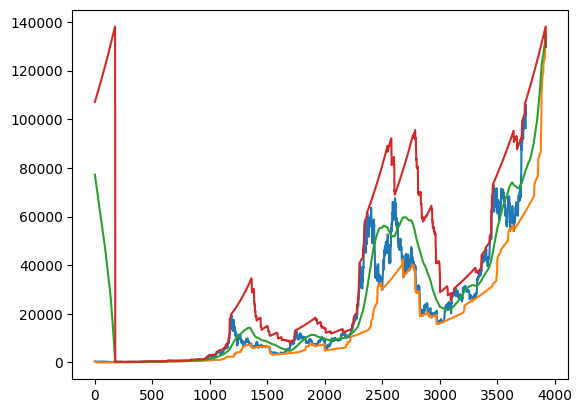

In [15]:
plt.plot(btc.Close.values)
plt.plot(bbesc181)
plt.show()

In [16]:
mfc181=most_frequency_cenarios(btc.Close.values,nbins=20,ngreater=0.95,lcenarios=181)

100%|██████████| 100/100 [00:28<00:00,  3.56it/s]


In [17]:
mm181=min_max_cenarios(btc.Close.values,num=100,lenc=181)

100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


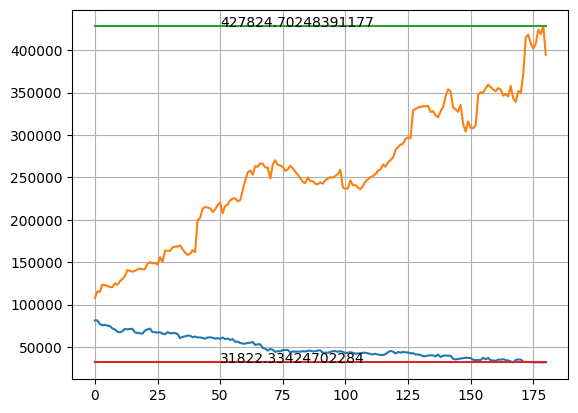

In [18]:
plt.plot(mm181[:,0])
plt.plot(mm181[:,1])
plt.plot([np.max(mm181[:,1])]*181)
plt.plot([np.min(mm181[:,0])]*181)
plt.text(x=50,y=np.max(mm181[:,1]),s=f'{np.max(mm181[:,1])}')
plt.text(x=50,y=np.min(mm181[:,0]),s=f'{np.min(mm181[:,0])}')
plt.grid()
plt.show()

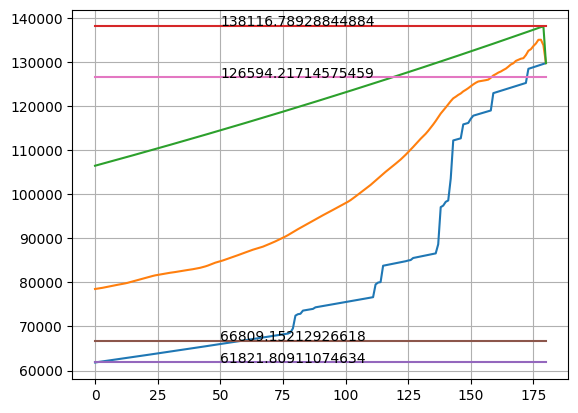

In [20]:
plt.plot(bbesc181[-181:])
plt.plot([np.max(bbesc181[-181:])]*181)
plt.plot([np.min(bbesc181[-181:])]*181)
plt.text(x=50,y=np.max(bbesc181[-181:])+100,s=f'{np.max(bbesc181[-181:])}')
plt.text(x=50,y=np.min(bbesc181[-181:])-100,s=f'{np.min(bbesc181[-181:])}')
plt.plot([mfc181[0]]*181)
plt.plot([mfc181[-1]]*181)
plt.text(x=50,y=mfc181[0],s=f'{mfc181[0]}')
plt.text(x=50,y=mfc181[-1],s=f'{mfc181[-1]}')
plt.grid()
plt.show()

In [24]:
bbesc1193=blind_boundary_exp_smooth_curve(btc.Close.values,1193)

In [25]:
mfc1193=most_frequency_cenarios(btc.Close.values,nbins=50,ngreater=0.99,lcenarios=1193)

100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


In [26]:
mm1193=min_max_cenarios(btc.Close.values,num=100,lenc=1193)

100%|██████████| 100/100 [21:30<00:00, 12.91s/it]


Text(500, 14140.31247104846, '14140.31247104846')

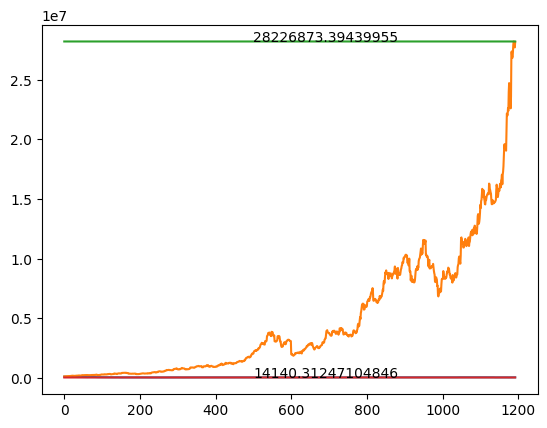

In [27]:
plt.plot(mm1193[:,0])
plt.plot(mm1193[:,1])
plt.plot([np.max(mm1193[:,1])]*1193)
plt.plot([np.min(mm1193[:,0])]*1193)
plt.text(x=500,y=np.max(mm1193[:,1]),s=f'{np.max(mm1193[:,1])}')
plt.text(x=500,y=np.min(mm1193[:,0]),s=f'{np.min(mm1193[:,0])}')

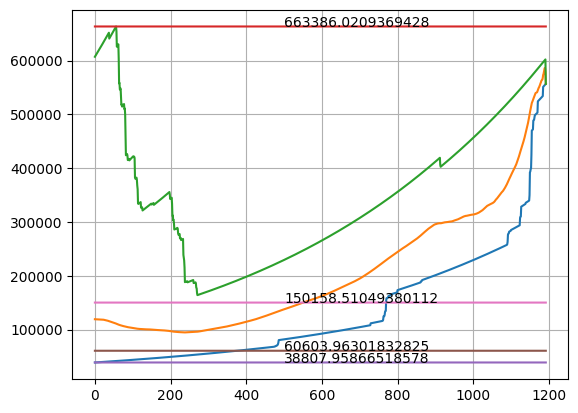

In [28]:
plt.plot(bbesc1193[-1193:])
plt.plot([np.max(bbesc1193[-1193:])]*1193)
plt.plot([np.min(bbesc1193[-1193:])]*1193)
plt.text(x=500,y=np.max(bbesc1193[-1193:])+100,s=f'{np.max(bbesc1193[-1193:])}')
plt.text(x=500,y=np.min(bbesc1193[-1193:])-100,s=f'{np.min(bbesc1193[-1193:])}')
plt.plot([mfc1193[0]]*1193)
plt.plot([mfc1193[-1]]*1193)
plt.text(x=500,y=mfc1193[0],s=f'{mfc1193[0]}')
plt.text(x=500,y=mfc1193[-1],s=f'{mfc1193[-1]}')
plt.grid()
plt.show()

In [29]:
pd.DataFrame(mfc181).to_csv("btcmfc181.csv")
pd.DataFrame(mfc1193).to_csv("btcmfc1193.csv")

In [30]:
pd.DataFrame(bbesc181).to_csv("btcbbesc181.csv")
pd.DataFrame(bbesc1193).to_csv("btcbbesc1193.csv")

In [31]:
pd.DataFrame(mm181).to_csv("btcmm181.csv")
pd.DataFrame(mm1193).to_csv("btcmm1193.csv")